1) USE Saved ConvNet for Distinguish Normal & Covid19 ChestXray Dataset...

In [1]:
# import libraries in usage

import os
import cv2
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt
from matplotlib import style
from collections import OrderedDict
import numpy as np
import nibabel as nib
from torch.utils.data import DataLoader , TensorDataset, SubsetRandomSampler, random_split

In [2]:

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on " + str(device) + ".")
else:
    device = torch.device("cpu")
    print("running on" + str(device) + ".")
# torch.cuda.device_count()


running on cuda:0.


In [3]:
#import ready model

import convNet

In [29]:
# load pre-saved model

cnn = convNet.Cnn().to(device)
opt = optim.Adam(cnn.parameters(), lr=0.001)

checkpoint = torch.load('D:/projects/Neural_Networks/coursera_v2/coursera/model/model_1.pt')
cnn.load_state_dict(checkpoint['model_state_dict'])
opt.load_state_dict(checkpoint['optimizer_state_dict'])

In [30]:
print(checkpoint['model_state_dict'])

OrderedDict([('conv1.weight', tensor([[[[-2.9696e-02, -3.5609e-02, -2.0870e-01,  2.1085e-01, -1.7806e-02],
          [ 1.4519e-01, -1.5574e-01, -1.7468e-01,  1.7834e-01, -1.6050e-01],
          [ 2.0091e-01,  5.6456e-02,  2.1414e-01, -1.2497e-01,  1.3202e-01],
          [-1.1438e-01, -8.6411e-02,  5.0857e-02, -3.2611e-01,  8.6292e-02],
          [-1.8233e-01,  2.0811e-01,  5.3619e-02,  1.2092e-01, -9.0156e-02]]],


        [[[ 9.8173e-02, -2.7826e-01, -1.2479e-01, -6.0146e-02, -2.6744e-02],
          [-2.2633e-01, -5.6944e-02, -2.5408e-01, -1.2539e-01, -2.8585e-01],
          [-2.6503e-01, -2.7382e-01,  9.2781e-02,  1.1952e-01, -5.9897e-02],
          [ 7.2968e-03, -2.0345e-02, -2.6023e-01, -2.5992e-01, -4.6298e-02],
          [-7.5828e-02,  2.7098e-01,  2.1946e-01, -2.1298e-02, -1.2766e-02]]],


        [[[ 2.5055e-02,  1.8420e-02, -5.7426e-02, -1.8742e-01,  1.4062e-01],
          [ 3.2736e-02, -1.7161e-01, -1.9953e-01,  3.4853e-01, -1.9661e-01],
          [-8.7011e-02, -9.4550e-02,  

In [6]:
###

In [7]:
###

In [8]:
data = np.load("D:\\projects\\Neural_Networks\\coursera_v3\\coursera\\data\\data_two_label.npy", allow_pickle=True)
print(len(data))   

1560


In [9]:
X = torch.Tensor([i[0] for i in data]) # create tensor for images

In [10]:
X = X / 255 # scale them to be between 0 and 1

In [11]:
X.shape

torch.Size([1560, 64, 64])

In [12]:
y = torch.Tensor([i[1] for i in data]) #observations / real labels / hot_vectors we created above

In [13]:
y

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [1., 0.]])

In [14]:
y.shape

torch.Size([1560, 2])

In [15]:
# now let's create datasets:

dataset = TensorDataset(X , y)

valid_set = torch.utils.data.Subset(dataset, (1,200))

In [16]:
>>> a = random_split(range(10), [3, 7])

In [17]:
print(random_split(range(10), [3, 7]))

[<torch.utils.data.dataset.Subset object at 0x000001AD85302E80>, <torch.utils.data.dataset.Subset object at 0x000001AD853025C0>]


In [18]:
print(a[1][5])

5


In [19]:
print(random_split(dataset, [100, 300, 1160]))

[<torch.utils.data.dataset.Subset object at 0x000001AD85302A58>, <torch.utils.data.dataset.Subset object at 0x000001AD85302A20>, <torch.utils.data.dataset.Subset object at 0x000001AD85302BA8>]


In [20]:
test_dt, valid_dt, train_dt = random_split(dataset, [100, 300, 1160]) # always choose random :).

In [21]:
sampler = SubsetRandomSampler(list(range(1160)))  # for now, let's just load only training data set.

In [22]:
BATCH_SIZE = 75

In [23]:
# let's create torch data loaders.

train = DataLoader(train_dt , batch_size = BATCH_SIZE, sampler= sampler)

valid = DataLoader(valid_dt , batch_size = BATCH_SIZE)

test = DataLoader(valid_dt , batch_size = 100) # we want them only for test, that's why one batch.

In [31]:
cnn.train()
test_dt = next(iter(train))
X, y = test_dt[0].view(-1, 1,64, 64).to(device), test_dt[1].to(device)
acc_,loss_ = fwd_pass(X.view(-1, 1, 64,64), y, cnn)
print("\n", acc_, loss_)

cnn.eval()
test_dt = next(iter(valid))
X, y = test_dt[0].view(-1, 1,64, 64).to(device), test_dt[1].to(device)
val_acc, val_loss = fwd_pass(X.view(-1, 1, 64,64), y, cnn)
print("\n", val_acc, val_loss)


test_dt = next(iter(test))
X, y = test_dt[0].view(-1, 1,64, 64).to(device), test_dt[1].to(device)
final_acc, final_loss = fwd_pass(X.view(-1, 1, 64,64), y, cnn)
print("\n", final_acc, final_loss)


 0.3333333333333333 tensor(0.5073, device='cuda:0', grad_fn=<MseLossBackward>)

 0.5466666666666666 tensor(0.4453, device='cuda:0', grad_fn=<MseLossBackward>)

 0.56 tensor(0.4247, device='cuda:0', grad_fn=<MseLossBackward>)


In [23]:
##

In [26]:

loss_function = nn.MSELoss()

In [37]:
def fwd_pass(X, y, net, train_=False):
    if train_:
        net.zero_grad()
    outputs = net(X.to(device))
    matches = [torch.argmax(i) == torch.argmax(j) for i, j in zip(outputs, y)]
    acc = matches.count(True) / len(matches)
    loss = loss_function(outputs, y)

    if train_:
        loss.backward()
        opt.step()

    return acc, loss

In [38]:
#train parameters

EPOCHS = 10 # to get faster results, apply for small number once. then, INCREASE it!!!!!!!!!!!!!!!!!

n= 1160 + 200

it = int(1160/200)

print(n, " ", it)

PT = "D:\\projects\\Neural_Networks\\coursera_v3\\coursera\\model\\MODELv1.2.pt"

1360   5


In [43]:
MODEL_NAME = f"model covid19.v1.2.-{time.asctime()}"

def Train(net):
    with open("model.log", "a") as f:
        for epoch in tqdm(range(EPOCHS)):
            for i in range(0, n, BATCH_SIZE):   
                dt = next(iter(train))
                batch_X = dt[0].view(-1, 1, 64, 64)
                batch_y = dt[1]
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)

                acc, loss = fwd_pass(batch_X, batch_y , net, train_=True)
                
                if i % it == 0:
                    val_acc, val_loss = Test(size=100)
                    f.write(
                        f"{MODEL_NAME},{round(time.time(), 3)},{round(float(acc), 2)},{round(float(loss), 4)},"
                        f"{round(float(val_acc), 2)},{round(float(val_loss), 4)},{epoch}\n")
                    torch.save({
                        'dropout cnn model': MODEL_NAME,
                        'epoch': epoch,
                        'model_state_dict': net.state_dict(),
                        'optimizer_state_dict': opt.state_dict()
                    }, PT)

In [44]:
def Test(size=32):
    test_dt = next(iter(valid))
    X, y = test_dt[0].view(-1, 1,64, 64).to(device), test_dt[1].to(device)
    val_acc, val_loss = fwd_pass(X.view(-1, 1, 64,64), y, cnn)
    return val_acc, val_loss

In [45]:
def create_acc_loss_graph(model_name):
    contents = open("../../coursera_v3/coursera/model.log", "r").read().split("\n")

    times = []
    accuracies = []
    losses = []

    val_accs = []
    val_losses = []

    for c in contents:
        if model_name in c:
            name, timestamp, acc, loss, val_acc, val_loss, epoch = c.split(",")

            times.append(float(timestamp))
            accuracies.append(float(acc))
            losses.append(float(loss))

            val_accs.append(float(val_acc))
            val_losses.append(float(val_loss))

    fig = plt.figure()

    ax1 = plt.subplot2grid((2, 1), (0, 0))
    ax2 = plt.subplot2grid((2, 1), (1, 0), sharex=ax1)

    ax1.plot(times, accuracies, label="acc")
    ax1.plot(times, val_accs, label="val_acc")
    ax1.legend(loc=2)
    ax2.plot(times, losses, label="loss")
    ax2.plot(times, val_losses, label="val_loss")
    ax2.legend(loc=2)
    plt.show()

model covid19.v1.2.-Wed Jul 29 17:55:17 2020


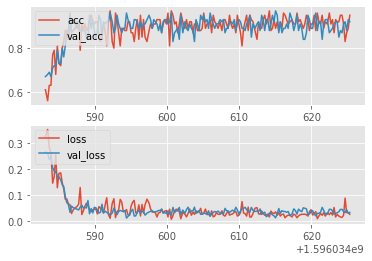

In [52]:
style.use("ggplot")
print(MODEL_NAME)

cnn.train()

#Train(cnn)
create_acc_loss_graph(MODEL_NAME)

In [ ]:
device

In [48]:
test_dt = next(iter(test))
X, y = test_dt[0].view(-1, 1,64, 64).to(device), test_dt[1].to(device)
final_acc, final_loss = fwd_pass(X.view(-1, 1, 64,64), y, cnn)
print("\n", final_acc, final_loss)


 0.91 tensor(0.0379, device='cuda:0', grad_fn=<MseLossBackward>)


In [53]:
with open("model.log", "a") as f:
    f.write(
                        f"\n {MODEL_NAME} notes: \n final acc: {final_acc}, \n final loss: {final_loss}, \n epochs: 10, \n batch size: 75,\n optimizer: Adam, \n loss function: MSELoss,\n model: model.pt, transferlearning from Cats & Dogs -convNet with Dropout,\n device: cuda 9.2 \n"
    )


In [126]:
# let's test one random single image of uninfected chest x ray, if it gets true prediction...

pt = 'D:\\onlinekurslar\\aifm\\chestxrayds\\images_001\\images\\00000015_000.png'

In [127]:
dt = []
img = cv2.imread(pt, cv2.IMREAD_GRAYSCALE) #for now let's make it gray scale
img = cv2.resize(img, (64, 64))
dt.append([np.array(img), np.eye(2)[1]]) # makes one_hot vector


In [128]:
x = torch.Tensor([i[0] for i in dt]) # create tensor for images

In [129]:
x = x/ 255.0

In [130]:
label = torch.Tensor([i[1] for i in dt])

In [131]:
x = x[:,None,:,:]

In [132]:
x.shape

torch.Size([1, 1, 64, 64])

In [133]:
cnn.eval()
truth, cost = fwd_pass(x.to(device), label.to(device), cnn)

In [134]:
print(truth, cost)

1.0 tensor(0., device='cuda:0', grad_fn=<MseLossBackward>)


In [135]:
label

tensor([[0., 1.]])

In [136]:
outout = cnn(x.to(device))

In [137]:
outout

tensor([[1.1519e-34, 1.0000e+00]], device='cuda:0', grad_fn=<SoftmaxBackward>)